<a href="https://colab.research.google.com/github/Zdestrion/ML_pvt_repo/blob/master/FFNN_shallow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### FeedForward Shallow Neural Network Example with Keras/TF

A sequential model with 1 dense layer used to classify handwritten numbers (0 to 9) from the standard MINIST datatset  

In [0]:
#import models & layers from TF/keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

print(tf.__version__)

2.2.0


In [0]:
#retrieve training data (MNIST dataset)
#60k images for training and 10k images for testing
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

#verify:
print ('images shape: ', train_images.shape)
print ('labels shape', train_labels.shape)

class_names = ['zero', 'uno', 'due', 'tre', 'quattro', 'cinque', 'sei', 'sette', 'otto', 'nove']

11493376/11490434 [==============================] - 0s 0us/step
images shape:  (60000, 28, 28)
labels shape (60000,)


NOTE: keras fornisce quattro arrays numpy:

* `train_images` e `train_labels`: training set e target (label) per il modello (vanno suddivisi in training e validation)
* `test_images` e `test_labels`: per il test delle prestazioni del modello (non devono mai essere usati per training o tuning degli iperparametri)

Le immagini sono array nmpy formato 28x28 con pixel in scala di grigio con valori nel range \[0,256\]. Le label sono vettori di interi nel range \[0,...,9\] che corrispondono al numero rappresentato in ogni immagine. 

(60000, 28, 28)
60000
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
(10000, 28, 28)
10000
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


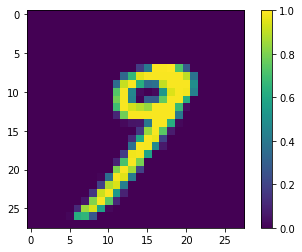

In [0]:
#Data exploration

print(train_images.shape)
print(len(train_labels))
print(train_labels)

print(test_images.shape)
print(len(test_labels))
print(test_labels)

plt.figure()
plt.imshow(train_images[33])
#plt.imshow(train_images[33], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
print('label: ', train_labels[33])

label:  9


In [0]:
#training data preprocessing
# normalize images intensities (pixel values) to [0,1] (be sure intensities are floating-points first)

train_images = train_images.astype('float32')  / 255.0
test_images = test_images.astype('float32')  / 255.0

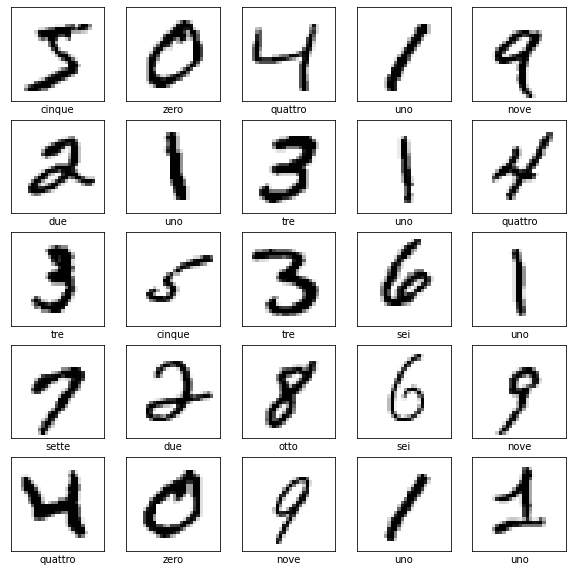

In [0]:
# plot 25 images to check everything is fine ...
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [0]:
# encode the labels in category using one_hot encoding (builtin in keras)

train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)

print('label: ', train_labels[33])

label:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [0]:
# convert images to flat vector of 28x28 pixels to be used in a dense layer 
# NOTE you can do that here or (better approach) to use a Flatten layer in the NN model as first layer
# in this example we use the Flatten layer ...

#train_images = train_images.reshape((60000, 28 * 28))
#test_images = test_images.reshape((10000, 28 * 28))

In [0]:
# Model definition (aka define the architecture of the network)

#sequential (aka Feed-Forward Neural Network)
model = keras.Sequential([
    
#first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a 
#two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). 
#This prepare the flat input feature vector containing al the pixels of each image for the NN
#This layer has no parameters to learn; it only reformats the data.
    
    keras.layers.Flatten(input_shape=(28, 28)),


#the network consists of a sequence of two tf.keras.layers.Dense layers. These are densely connected, or 
#fully connected, neural layers. The first Dense layer has 256 nodes (or neurons) and activation function an 
#hyperbolic tangent, the second layer has 10 neurons with activation softmax: means each one of the neurons 
#output a probability [0,1] with the constraint sum(outputs) = 1 (i.e. the output neurons add up to 1)
    
    keras.layers.Dense(256, activation='tanh'),
    keras.layers.Dense(10, activation='softmax')

])

In [0]:
# Model definition alternativa con il metodo funzionale ...

inputs = keras.Input(shape=(28,28,))

x = keras.layers.Flatten()(inputs)
x = keras.layers.Dense(256, activation='tanh')(x)
outputs = keras.layers.Dense(10, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs, name='my_mnist_model')

In [0]:
#Compile the model

# Training parameters: 
# we need to define: 
# * Loss function: this measures how accurate the model is during training
# * Optimizer: this is how the model is updated based on the data it sees and its loss function
# * Metrics: used to monitor the training and testing steps

#sgd: stochastic gradient descent
#categoraical_crossentropy: loss that measure the the distance between two probability distributions  
#                           (the probability output from the network and the true distribution of the labels)
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
#print summary of the model
model.summary()

Model: "my_mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Train phase
# define batch_size for the stcastic gradient and number of epochs
# and the fraction of trainign events used for validation (validation_split)

history = model.fit(train_images, train_labels, epochs=500, batch_size=128,
                    validation_split=0.2, shuffle=True, verbose=1)

Epoch 1/500
375/375 [==============================] - 1s 3ms/step - loss: 1.0947 - accuracy: 0.7344 - val_loss: 0.6272 - val_accuracy: 0.8629
Epoch 2/500
375/375 [==============================] - 1s 3ms/step - loss: 0.5716 - accuracy: 0.8599 - val_loss: 0.4687 - val_accuracy: 0.8832
Epoch 3/500
375/375 [==============================] - 1s 2ms/step - loss: 0.4702 - accuracy: 0.8769 - val_loss: 0.4093 - val_accuracy: 0.8944
Epoch 4/500
375/375 [==============================] - 1s 2ms/step - loss: 0.4227 - accuracy: 0.8860 - val_loss: 0.3767 - val_accuracy: 0.8991
Epoch 5/500
375/375 [==============================] - 1s 2ms/step - loss: 0.3939 - accuracy: 0.8924 - val_loss: 0.3561 - val_accuracy: 0.9025
Epoch 6/500
375/375 [==============================] - 1s 2ms/step - loss: 0.3741 - accuracy: 0.8971 - val_loss: 0.3414 - val_accuracy: 0.9063
Epoch 7/500
375/375 [==============================] - 1s 3ms/step - loss: 0.3591 - accuracy: 0.9003 - val_loss: 0.3303 - val_accuracy: 0.9091

In [0]:
#checks accuracy and loss on test sample

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.0687 - accuracy: 0.9786

Test accuracy: 0.978600025177002


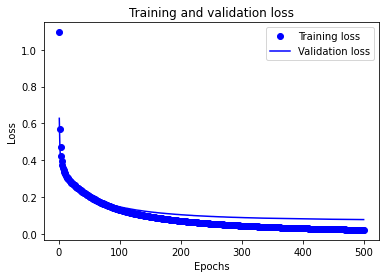

In [0]:
# plot traing and validation loss
import matplotlib.pyplot as plt

#retrieve the History object produced by the fit: a dictionary containing data about 
# everything that happened during training
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

#'bo' = blue dot
#'b' = solid blue line
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
#plt.axis([0,40,0.1,0.3])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

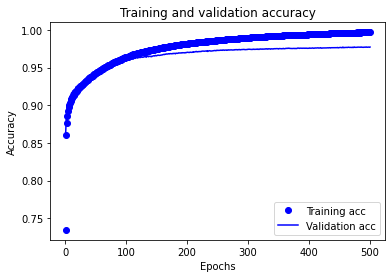

In [0]:
#plotting trainig and validation accuracy

acc_values = history_dict['accuracy'] 
val_acc_values = history_dict['val_accuracy']

plt.clf()
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
#plt.axis([0,11,0.9,1])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [0]:
#use the trained newtrok for predictions on additional dataset

predictions = model.predict(test_images)

print(predictions[0])
print('Max probability for number:', np.argmax(predictions[0]))
print(test_labels[0])
print('True label is:',np.argmax(test_labels[0]))

[1.1141921e-06 1.2332982e-08 1.5407550e-05 5.2547787e-04 9.1325312e-09
 1.9866079e-07 3.6712222e-10 9.9943966e-01 4.1897742e-06 1.3896337e-05]
Max probability for number: 7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
True label is: 7


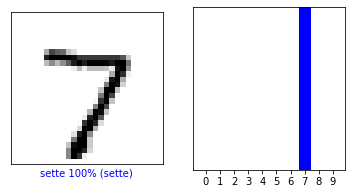

In [0]:
#Plot probabilities for the 10 classes
# Color correct predictions in blue and incorrect predictions in red.

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, np.argmax(true_label[i]), img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, np.argmax(true_label[i])
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


#example 0th-image
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

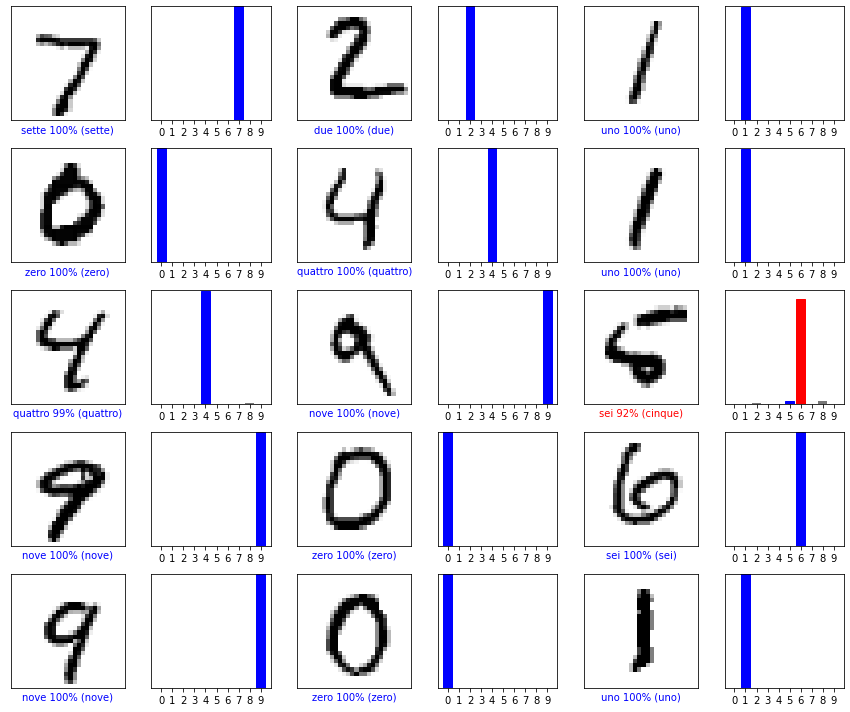

In [0]:
# Plot the first num_rows x num_cols test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()